In [38]:
! pip install pandas openpyxl scikit-learn matplotlib seaborn

In [39]:
import pandas as pd

def load_vps_cluster_data(filepath="./data/koh-et-al-2024 data.xlsx"):
    """
    Loads and preprocesses the 'data_clustered_stats' sheet from the specified Excel file.

    - Reads only the 'data_clustered_stats' sheet
    - Skips the first column (column A)
    - Reads rows 2 through 55 (Excel row indices)
    
    Returns:
        pd.DataFrame: The cleaned dataframe
    """
    df = pd.read_excel(
        filepath,
        sheet_name="data_clustered_stats",
        nrows=55
    )
    df = df.iloc[:, 1:]
    df = df.fillna(0)
    return df

In [40]:
df = load_vps_cluster_data()
print(df.shape)
df.head()

(54, 28)


,Use of first name,hustle,Scold,Silence,management,physical assistance,pre-instruction,pre-instruction Values,concurrent instructions,concurrent instructions Values,...,positive modelling values,uncodable,negative modeling values,positive modelling transfer,pre instruction transfer,post instruction transfer,concurrent instruction transfer,questioning transfer,negative modelling transfer,praise transfer
0,0,0,0,50,43,10,0,0,0,0,...,0.0,0,0,0,0,1,0,0,0,0
1,6,9,2,19,7,73,0,14,0,21,...,0.0,0,0,0,0,0,0,0,0,0
2,6,0,2,43,9,48,7,12,2,104,...,0.0,0,0,0,0,0,0,0,0,0
3,1,20,0,30,2,23,0,11,0,13,...,0.0,0,0,0,0,0,0,0,0,0
4,4,10,2,8,18,39,3,29,2,53,...,0.0,0,0,0,0,0,0,0,0,0


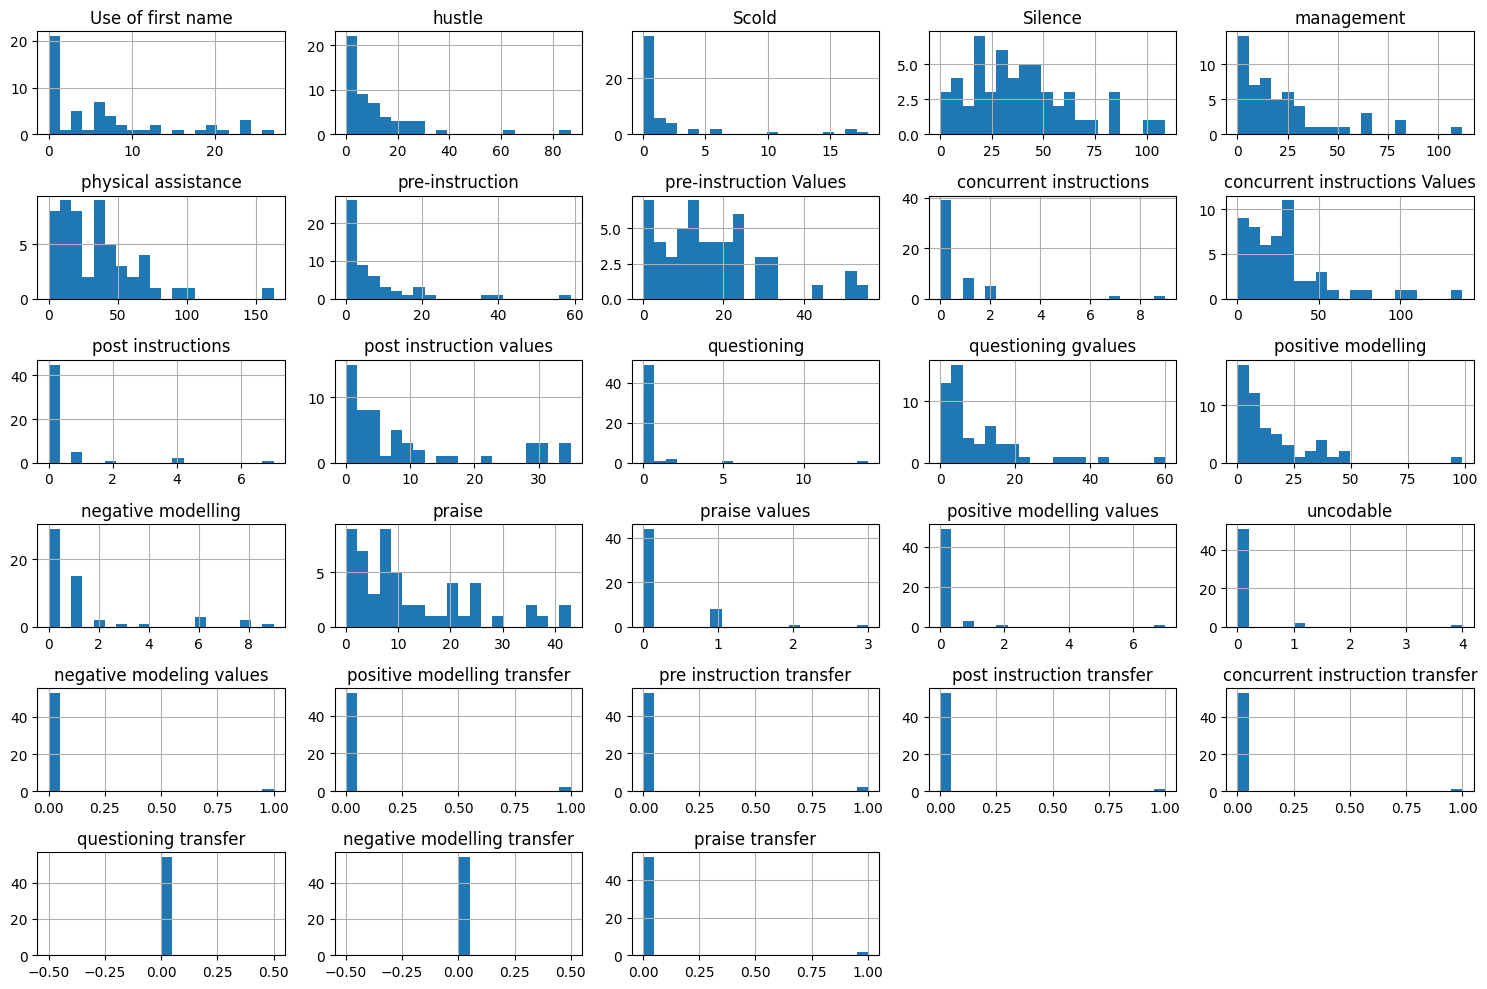

In [41]:
import matplotlib.pyplot as plt
# Visualize distributions for each column
df.hist(figsize=(15,10), bins=20)
plt.tight_layout()
plt.show()

In [42]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
import matplotlib.pyplot as plt

def normalize_minmax(df):
    """
    Normalize dataframe to [0,1] range using MinMaxScaler.
    """
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(df)
    return pd.DataFrame(scaled, columns=df.columns)

def find_optimal_k(data, k_range=range(2, 10)):
    """
    Use Calinski-Harabasz score to find optimal number of clusters.
    """
    scores = []
    for k in k_range:
        model = KMeans(n_clusters=k, random_state=42)
        labels = model.fit_predict(data)
        score = calinski_harabasz_score(data, labels)
        scores.append(score)
    
    # Plot CH scores
    plt.plot(k_range, scores, marker='o')
    plt.xlabel("Number of clusters (k)")
    plt.ylabel("Calinski-Harabasz Score")
    plt.title("Optimal k via Calinski-Harabasz")
    plt.grid(True)
    plt.show()
    
    # Return best k
    best_k = k_range[scores.index(max(scores))]
    print(f"Optimal k based on CH score: {best_k}")
    return best_k

def cluster_vps_data(df, k=None):
    """
    Full pipeline: normalize, choose optimal k (if not given), cluster with KMeans.
    
    Returns:
        clustered_df: dataframe with cluster labels
        model: fitted KMeans model
    """
    norm_df = normalize_minmax(df)
    
    if k is None:
        k = find_optimal_k(norm_df)
    
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(norm_df)
    
    clustered_df = df.copy()
    clustered_df['Cluster'] = labels
    
    return clustered_df, model



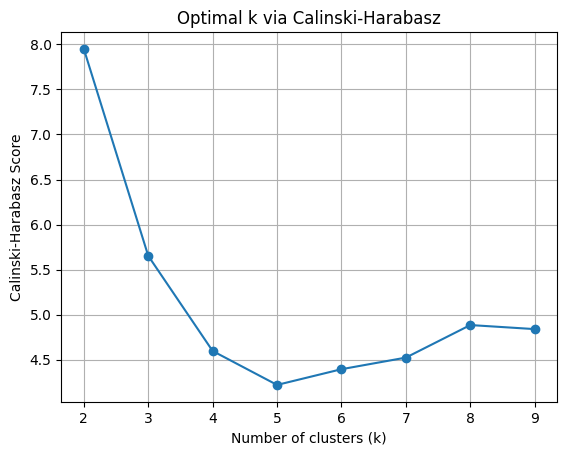

Optimal k based on CH score: 2
Cluster
1    43
0    11
Name: count, dtype: int64


In [43]:
# df = df.dropna()  # Drop rows with missing values
df = normalize_minmax(df)
clustered_df, kmeans_model = cluster_vps_data(df)
# View cluster sizes
print(clustered_df['Cluster'].value_counts())

In [44]:
# Mean values of features by cluster
print(clustered_df.groupby('Cluster').mean(numeric_only=True))

         Use of first name    hustle     Scold   Silence  management  \
Cluster                                                                
0                 0.353535  0.324974  0.439394  0.201835    0.121753   
1                 0.217054  0.082331  0.031008  0.398122    0.219684   

         physical assistance  pre-instruction  pre-instruction Values  \
Cluster                                                                 
0                   0.241495         0.114022                0.483766   
1                   0.212441         0.116673                0.260382   

         concurrent instructions  concurrent instructions Values  ...  \
Cluster                                                           ...   
0                       0.202020                        0.247036  ...   
1                       0.036176                        0.204584  ...   

         positive modelling values  uncodable  negative modeling values  \
Cluster                                           